<a href="https://colab.research.google.com/github/Shreshth-112/ai_models/blob/main/gradient_descent_code_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [2]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

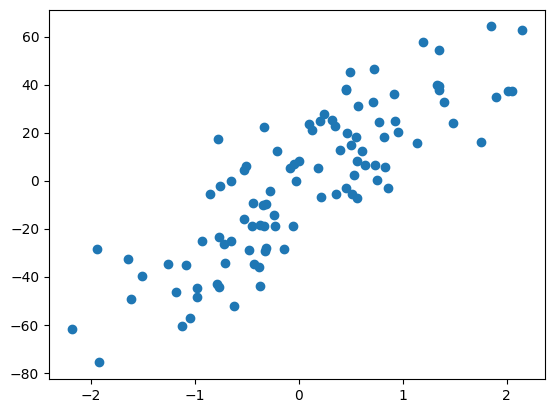

In [3]:
plt.scatter(X,y)

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lr = LinearRegression()

In [7]:
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783825


In [14]:
np.mean(cross_val_score(lr,X,y,scoring='r2',cv=10))

0.6375011587464419

In [8]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6345158782661012

## <b> <font color='brown'>Creating my own Class</font>

---

After partial differentiation:<br>
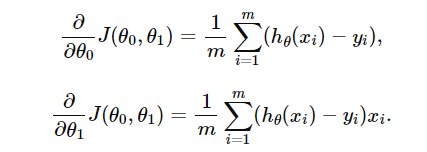
<br>
loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)<br>
loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())

In [9]:
class GDRegressor:

    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,X,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())

            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)

    def predict(self,X):
        return self.m * X + self.b


In [10]:
gd = GDRegressor(0.001,50)

In [11]:
gd.fit(X_train,y_train)

28.159367347119066 -2.3004574196824854


In [12]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6343842836315579